In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from genCo import getGenCos, plotResults 
from main import getFutureData

In [2]:
dfISO = pd.read_csv('data/ISNEGEN23.csv')
dfISO = dfISO.reset_index(drop=True)
numGenerators = dfISO.shape[0]
cap_rate = 1.0
fuelMappingDict = dict(zip(dfISO['Technology'].tolist(), dfISO['Energy Source Code'].tolist()))
genCos = getGenCos(numGenerators, dfISO, fuelMappingDict)
dfCSO = pd.read_csv('data/CSO2023.csv', skiprows=0, index_col=None)
for gen in genCos: gen.updateCSO(dfCSO, dfISO, cap_rate, [1, 1], 'January');

In [3]:
# __, __, __, dfISO, info = getFutureData(ISO='ISNE', verbose=False, path='data/forecast/' , 
#                                                                         load_rate='high', vre_mix='high')
# fuelMappingDict = dict(zip(dfISO['Technology'].tolist(), dfISO['Energy Source Code'].tolist()))
# numGenerators, totalCap, adjRatios, cap_rate, LOLE = info[0][0], info[1][0], info[2], info[3][0], info[4][0]
# genCos = getGenCos(numGenerators, dfISO, fuelMappingDict)
# dfCSO = pd.read_csv('data/CSO2023.csv', skiprows=0, index_col=None)
# for gen in genCos: gen.updateCSO(dfCSO, dfISO, cap_rate, adjRatios, 'January');

{'Hydro': 3385.0129999999886, 'Oil': 947.0350000000005, 'Gas': 15703.47700000002, 'Nuclear': 3333.1130000000003, 'Wood': 3.7969999999999997, 'Other': 4055.5880000000016, 'Coal': 437.99999999999994, 'Solar': 29.56000000000007, 'Wind': 559.6180000000004, 'Waste': 734.3949999999999}
{'Hydro': 3720.9999999999986, 'Oil': 6021.300000000006, 'Gas': 18726.3, 'Nuclear': 3404.9, 'Wood': 610.6, 'Other': 680.8, 'Coal': 559.2, 'Solar': 2455.7000000000003, 'Wind': 1540.2, 'Waste': 464.00000000000006}


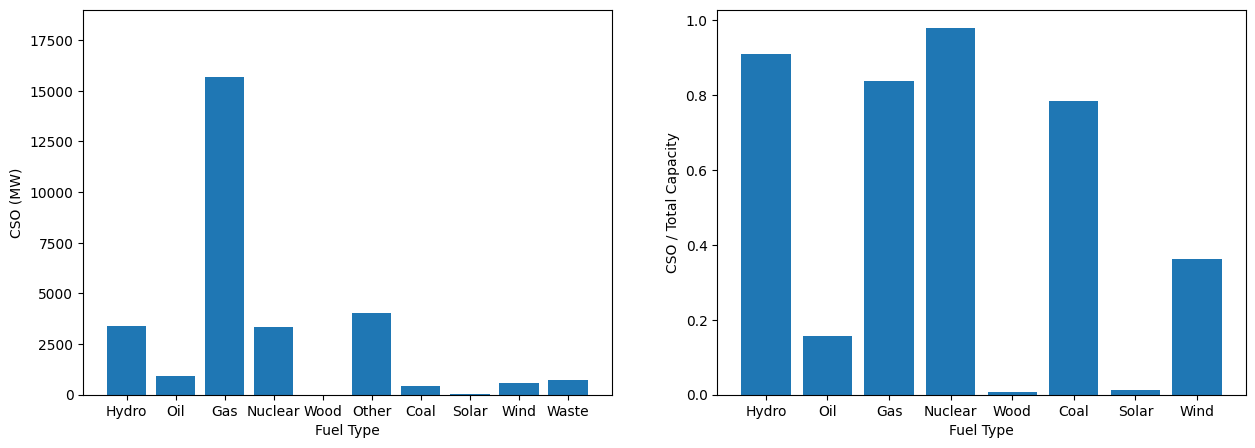

In [4]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
csoHist = {}
for genco in genCos:
    temp = genco.CapObl

    if genco.fuelType in csoHist:
        csoHist[genco.fuelType] += temp
    else:
        csoHist[genco.fuelType] = temp
print(csoHist)

labels = list(csoHist.keys())
weights = list(csoHist.values())

plt.bar(labels, weights)
plt.xlabel('Fuel Type')
plt.ylabel('CSO (MW)');
plt.ylim(0, 19000)

plt.subplot(1, 2, 2)
capHist = {}
for genco in genCos:
    temp = genco.MaxCap

    if genco.fuelType in capHist:
        capHist[genco.fuelType] += temp
    else:
        capHist[genco.fuelType] = temp
print(capHist)

del capHist['Other']; del csoHist['Waste']
del csoHist['Other']; del capHist['Waste']
labels = list(csoHist.keys())
weights = list(csoHist.values())
labels2 = list(capHist.keys())
weights2 = list(capHist.values())

plt.bar(labels2, np.array(weights) / np.array(weights2))
# plt.ylim(0, 19000)
plt.xlabel('Fuel Type')
plt.ylabel('CSO / Total Capacity');

In [9]:
dfCSO['January'].sum(), np.array(weights).sum(), np.array(weights2).sum(), cap_rate, adjRatios

(29189.596,
 31105.232136312385,
 87823.1999999999,
 2.3,
 0    15.384829
 1     0.770647
 Name: adjRatios, dtype: float64)